In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget    # interactive 3d plots
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

# Feature (MFCC) extraction (Dataset generation)

In [2]:
# run this function if you need to generate a csv data set from scratch
# data_loader.generate_csv_dataset()
X, y, ID = data_loader.load_dataset(should_generate_dataset=True, 
                                    use_vad=False, 
                                    use_delta_mfcc=False,
                                    use_delta_delta_mfcc=True)

{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}
INFO: n_fft=16384, n_mfcc=34
{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}


100%|██████████| 1440/1440 [03:19<00:00,  7.23it/s]


--- Data loaded. Loading time: 199.19951677322388 seconds ---
X.shape =  (1440, 306)
y.shape =  (1440, 1)
ID.shape =  (1440, 1)
data loaded in 0.14413976669311523ms
          0         1         2         3         4         5         6  \
0 -1.248981 -0.033430  0.786756  0.378074  1.070088  0.904281  0.811647   
1 -1.158273  0.281592  0.356069  0.448270  1.538343  1.023633  0.697817   
2 -1.080060  0.302178  0.844709  0.200596  1.195068  0.293860  0.969450   
3 -1.019312  0.215039  0.984096  0.239148  1.076327  0.578099  1.225705   
4 -1.407054  0.314701  0.959916  0.550950  1.346443  0.962968  0.885083   

          7         8         9  ...       296       297       298       299  \
0  0.646303  0.696793  1.172099  ...  0.337302 -0.178298 -1.809810 -1.093223   
1  1.065701  0.944865  0.504394  ... -0.212205  0.468056 -1.501291 -1.606385   
2  0.806702  0.797736  0.689766  ...  0.239977  0.211448 -1.074334 -1.096989   
3  1.121330  0.482401  0.192216  ... -0.095692 -0.665674 -0.7805

# Loading Dataset

In [5]:
# X, y, ID = data_loader.load_dataset()
# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv', 
#                                     y_path='data/y_labels_4096.csv',
#                                     ID_path='data/IDs_4096.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192.csv', 
#                                     y_path='data/y_labels_8192.csv',
#                                     ID_path='data/IDs_8192.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_16384.csv', 
#                                     y_path='data/y_labels_16384.csv',
#                                     ID_path='data/IDs_16384.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_32768.csv', 
#                                     y_path='data/y_labels_32768.csv',
#                                     ID_path='data/IDs_32768.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192_vad.csv', 
#                                     y_path='data/y_labels_8192.csv',
#                                     ID_path='data/IDs_8192.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096_vad.csv', 
#                                     y_path='data/y_labels_4096.csv',
#                                     ID_path='data/IDs_4096.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_mfcc_delta_nfft_8192.csv', 
#                                     y_path='data/y_labels.csv',
#                                     ID_path='data/IDs.csv')

X, y, ID = data_loader.load_dataset(X_path='data/2023-11-08/feature_mfcc_34_delta_delta_nfft_8192.csv', 
                                    y_path='data/2023-11-08/y_labels_feature_34_mfcc_delta_delta_nfft_8192.csv',
                                    ID_path='data/2023-11-08/IDs_feature_mfcc_34_delta_delta_nfft_8192.csv') 

# X, y, ID = data_loader.load_dataset(X_path='data/2023-11-08/feature_mfcc_34_delta_delta_nfft_16384.csv', 
#                                     y_path='data/2023-11-08/y_labels_feature_34_mfcc_delta_delta_nfft_16384.csv',
#                                     ID_path='data/2023-11-08/IDs_feature_mfcc_34_delta_delta_nfft_16384.csv') 

# ID['0'].unique()    # actors
group_members= data_loader.get_k_fold_group_member()
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
# print(len(X_k_folds))

data loaded in 0.1961963176727295ms
          0         1         2         3         4         5         6  \
0  0.336871 -0.435096 -0.528749 -0.887267 -1.292766 -0.518020 -0.011198   
1 -0.468134 -0.413905  0.058266 -0.232648 -1.060720  0.221737 -0.215321   
2 -0.922746  0.974136 -0.251311 -0.012766 -0.892089  0.298005  0.805719   
3  0.975510 -1.666593 -0.103313 -0.770493 -1.769129 -0.174523 -0.223740   
4  0.532362 -1.482253 -0.859983 -0.911459 -1.539792 -0.309231 -0.274056   

          7         8         9  ...       296       297       298       299  \
0 -1.228538 -1.060514 -1.297252  ...  0.017087  0.224590  0.161242  0.006168   
1 -0.634865 -0.649460 -0.536916  ...  0.313063 -0.636263 -0.047173  1.310438   
2  0.349388 -0.154100 -0.666315  ...  1.228394 -0.249830  0.722242  0.381835   
3 -1.264422 -0.923537 -0.851813  ...  0.034416  2.012123 -1.631706 -0.239349   
4 -1.310225 -0.589375 -0.332194  ... -0.339507 -0.944424 -1.027544  0.072782   

        300       301       302 

# GridSearch SVM-RBF

In [10]:
# del UAR_surf, UAR_list

In [6]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


UAR = 0.313
C = 0.100000, gamma = 0.000316


100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


UAR = 0.322
C = 0.100000, gamma = 0.000527


100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


UAR = 0.339
C = 0.100000, gamma = 0.000880


100%|██████████| 5/5 [00:02<00:00,  2.33it/s]


UAR = 0.370
C = 0.100000, gamma = 0.001468


100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


UAR = 0.382
C = 0.100000, gamma = 0.002448


100%|██████████| 5/5 [00:02<00:00,  2.24it/s]


UAR = 0.382


100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


UAR = 0.356


100%|██████████| 5/5 [00:02<00:00,  2.19it/s]


UAR = 0.297


100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


UAR = 0.179


100%|██████████| 5/5 [00:02<00:00,  2.19it/s]


UAR = 0.126


100%|██████████| 5/5 [00:02<00:00,  2.36it/s]


UAR = 0.323


100%|██████████| 5/5 [00:02<00:00,  2.43it/s]


UAR = 0.348


100%|██████████| 5/5 [00:02<00:00,  2.46it/s]


UAR = 0.381


100%|██████████| 5/5 [00:01<00:00,  2.52it/s]


UAR = 0.396
C = 0.187382, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  2.50it/s]


UAR = 0.413
C = 0.187382, gamma = 0.002448


100%|██████████| 5/5 [00:02<00:00,  2.41it/s]


UAR = 0.394


100%|██████████| 5/5 [00:02<00:00,  2.26it/s]


UAR = 0.370


100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


UAR = 0.296


100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


UAR = 0.179


100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


UAR = 0.126


100%|██████████| 5/5 [00:02<00:00,  2.48it/s]


UAR = 0.376


100%|██████████| 5/5 [00:01<00:00,  2.56it/s]


UAR = 0.399


100%|██████████| 5/5 [00:01<00:00,  2.65it/s]


UAR = 0.410


100%|██████████| 5/5 [00:01<00:00,  2.67it/s]


UAR = 0.418
C = 0.351119, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  2.67it/s]


UAR = 0.424
C = 0.351119, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  2.52it/s]


UAR = 0.417


100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


UAR = 0.387


100%|██████████| 5/5 [00:02<00:00,  2.19it/s]


UAR = 0.322


100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


UAR = 0.179


100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


UAR = 0.126


100%|██████████| 5/5 [00:01<00:00,  2.61it/s]


UAR = 0.404


100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


UAR = 0.423


100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


UAR = 0.421


100%|██████████| 5/5 [00:01<00:00,  2.89it/s]


UAR = 0.435
C = 0.657933, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  2.84it/s]


UAR = 0.451
C = 0.657933, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  2.61it/s]


UAR = 0.443


100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


UAR = 0.436


100%|██████████| 5/5 [00:02<00:00,  2.15it/s]


UAR = 0.357


100%|██████████| 5/5 [00:02<00:00,  2.16it/s]


UAR = 0.205


100%|██████████| 5/5 [00:02<00:00,  2.18it/s]


UAR = 0.126


100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


UAR = 0.416


100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


UAR = 0.424


100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


UAR = 0.449


100%|██████████| 5/5 [00:01<00:00,  3.11it/s]


UAR = 0.460
C = 1.232847, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


UAR = 0.471
C = 1.232847, gamma = 0.002448


100%|██████████| 5/5 [00:02<00:00,  2.40it/s]


UAR = 0.467


100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


UAR = 0.452


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.402


100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


UAR = 0.312


100%|██████████| 5/5 [00:02<00:00,  2.06it/s]


UAR = 0.191


100%|██████████| 5/5 [00:01<00:00,  3.04it/s]


UAR = 0.437


100%|██████████| 5/5 [00:01<00:00,  3.19it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


UAR = 0.470


100%|██████████| 5/5 [00:01<00:00,  3.22it/s]


UAR = 0.477
C = 2.310130, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


UAR = 0.480
C = 2.310130, gamma = 0.002448


100%|██████████| 5/5 [00:02<00:00,  2.30it/s]


UAR = 0.471


100%|██████████| 5/5 [00:02<00:00,  2.15it/s]


UAR = 0.450


100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


UAR = 0.404


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.312


100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


UAR = 0.191


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


UAR = 0.452


100%|██████████| 5/5 [00:01<00:00,  3.40it/s]


UAR = 0.469


100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


UAR = 0.479


100%|██████████| 5/5 [00:01<00:00,  3.36it/s]


UAR = 0.478


100%|██████████| 5/5 [00:01<00:00,  2.63it/s]


UAR = 0.476


100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


UAR = 0.471


100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


UAR = 0.449


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.404


100%|██████████| 5/5 [00:02<00:00,  2.07it/s]


UAR = 0.312


100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


UAR = 0.191


100%|██████████| 5/5 [00:01<00:00,  3.52it/s]


UAR = 0.475


100%|██████████| 5/5 [00:01<00:00,  3.60it/s]


UAR = 0.476


100%|██████████| 5/5 [00:01<00:00,  3.62it/s]


UAR = 0.471


100%|██████████| 5/5 [00:01<00:00,  3.15it/s]


UAR = 0.476


100%|██████████| 5/5 [00:01<00:00,  2.57it/s]


UAR = 0.476


100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


UAR = 0.470


100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


UAR = 0.449


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.404


100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


UAR = 0.312


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.191


100%|██████████| 5/5 [00:01<00:00,  3.73it/s]


UAR = 0.469


100%|██████████| 5/5 [00:01<00:00,  3.73it/s]


UAR = 0.463


100%|██████████| 5/5 [00:01<00:00,  3.61it/s]


UAR = 0.471


100%|██████████| 5/5 [00:01<00:00,  3.02it/s]


UAR = 0.482
C = 15.199111, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  2.55it/s]


UAR = 0.476


100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


UAR = 0.470


100%|██████████| 5/5 [00:02<00:00,  2.13it/s]


UAR = 0.449


100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


UAR = 0.404


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.312


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.191


100%|██████████| 5/5 [00:01<00:00,  3.83it/s]


UAR = 0.462


100%|██████████| 5/5 [00:01<00:00,  3.76it/s]


UAR = 0.459


100%|██████████| 5/5 [00:01<00:00,  3.44it/s]


UAR = 0.469


100%|██████████| 5/5 [00:01<00:00,  2.99it/s]


UAR = 0.482
C = 28.480359, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  2.55it/s]


UAR = 0.476


100%|██████████| 5/5 [00:02<00:00,  2.25it/s]


UAR = 0.470


100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


UAR = 0.449


100%|██████████| 5/5 [00:02<00:00,  2.08it/s]


UAR = 0.404


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.312


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.191


100%|██████████| 5/5 [00:01<00:00,  3.84it/s]


UAR = 0.452


100%|██████████| 5/5 [00:01<00:00,  3.80it/s]


UAR = 0.461


100%|██████████| 5/5 [00:01<00:00,  3.49it/s]


UAR = 0.465


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


UAR = 0.482


100%|██████████| 5/5 [00:01<00:00,  2.56it/s]


UAR = 0.476


100%|██████████| 5/5 [00:02<00:00,  2.27it/s]


UAR = 0.470


100%|██████████| 5/5 [00:02<00:00,  2.12it/s]


UAR = 0.449


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.404


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.312


100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


UAR = 0.191


100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


UAR = 0.455


100%|██████████| 5/5 [00:01<00:00,  3.74it/s]


UAR = 0.457


100%|██████████| 5/5 [00:01<00:00,  3.48it/s]


UAR = 0.465


100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


UAR = 0.482


100%|██████████| 5/5 [00:01<00:00,  2.56it/s]


UAR = 0.476


100%|██████████| 5/5 [00:02<00:00,  2.26it/s]


UAR = 0.470


100%|██████████| 5/5 [00:02<00:00,  2.15it/s]


UAR = 0.449


100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


UAR = 0.404


100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


UAR = 0.312


100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

UAR = 0.191
UAR_best = 0.482, C_best = 28.480359, gamma_best = 0.001468


## Result visualization

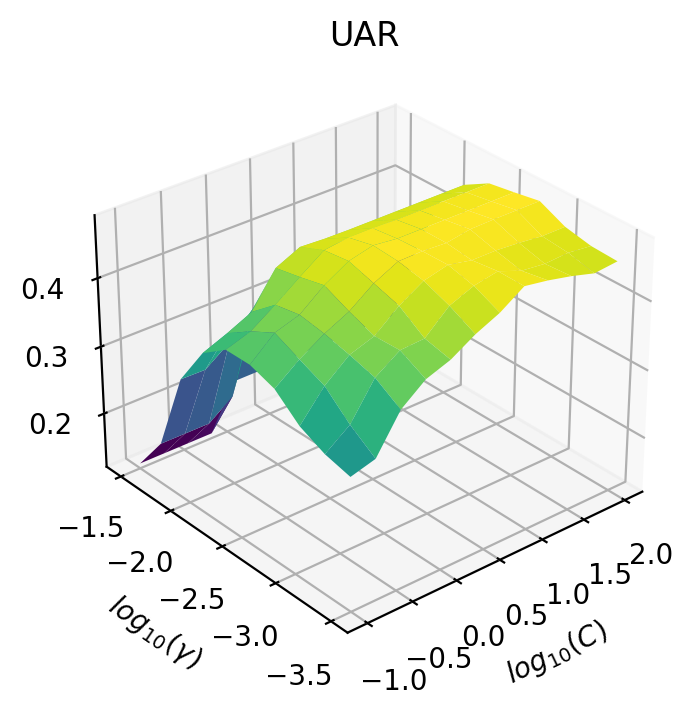

In [24]:
fig = plt.figure(dpi=200)
# fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

log_g, log_C = np.meshgrid(np.log10(gamma),np.log10(C))

# ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
ax.plot_surface(log_C, log_g, UAR_surf, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# ax.scatter(log_C, log_g, UAR_surf, c=UAR_surf, cmap='viridis', linewidth=0.5)
# ax.bar3d(np.log10(C), np.log10(gamma), UAR_surf,dx=1, dy=1, dz=1)
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
ax.set_title('UAR')
ax.set_zlabel('$\mathrm{UAR}$')
ax.view_init(30, 230)
# plt.show()
# image_path = "Doc/figures/UAR_svm_rbf_8192.jpg"
# fig.savefig(image_path, format='jpg', dpi=220, bbox_inches='tight', pad_inches=0.2)

# Confusion matrix

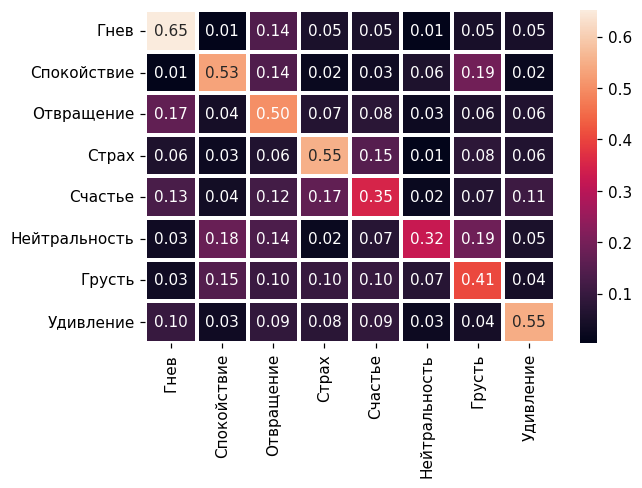

Saving confusion matrix with name:  Doc/figures/confusion_matrix.jpg


In [26]:
# plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)
plotting_utils.plot_confusion_matrix(y_test, y_true, y_pred)